# Regression ADTK(ALL)

## Демо метода на небольшом отрезке данных

In [ ]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/InControl/Anomaly_data/1group_2017_01-2017_04.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
df

<ipython-input-4-7e2aa5d6ca4b>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/content/drive/MyDrive/InControl/Anomaly_data/1group_2017_01-2017_04.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)


,20MBY10CE901_XQ01,20MBY00CS901_XQ01,20MBL11CT010_XQ01,20MBL11CM001_XQ01,20MBL10CP003_XQ01,20MBL10CP004_XQ01,20MBL10CP005_XQ01,20MBL10CP010_XQ01,20MBA11DG002_XQ01,20MBA11CP101_XQ01,20MBA11CT101A_XQ01,20MBA11CT102A_XQ01,20MBA11CT103A_XQ01,20MBA11CT111A_XQ01,20MBA12CT101B_XQ01,20MBA12CT102B_XQ01
timestamp,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,8.326673e-17,-0.405709,-0.173892,0.048161,0.232300,-0.055052,-0.076023,0.124137,-0.005792,-0.570368,-0.146919,-0.143310,-0.156391,-0.143149,-0.116031,-0.109107
2017-01-01 00:05:00,8.326673e-17,-0.405709,-0.173892,0.049146,0.228187,-0.055052,-0.084615,0.124137,-0.005792,-0.559324,-0.146919,-0.143310,-0.156391,-0.143149,-0.116031,-0.109107
2017-01-01 00:10:00,8.326673e-17,-0.405709,-0.174559,0.040777,0.220460,-0.082740,-0.084615,0.124137,-0.005792,-0.571842,-0.146919,-0.143310,-0.153543,-0.143149,-0.117659,-0.109107
2017-01-01 00:15:00,8.326673e-17,-0.405709,-0.174559,0.046623,0.229683,-0.035173,-0.084615,0.124137,-0.005792,-0.563006,-0.144010,-0.137521,-0.153543,-0.140254,-0.114403,-0.105784
2017-01-01 00:20:00,8.326673e-17,-0.405704,-0.175050,0.047970,0.237744,-0.034436,-0.083737,0.120433,-0.004301,-0.563195,-0.147464,-0.140959,-0.154085,-0.140791,-0.113770,-0.105129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-31 23:35:00,8.326673e-17,-0.405842,-0.317663,0.170804,0.255922,0.750581,0.603340,0.473256,-0.043481,-0.041337,-0.319291,-0.309011,-0.307913,-0.282986,-0.244380,-0.236970
2017-03-31 23:40:00,8.326673e-17,-0.405840,-0.318756,0.159163,0.262214,0.750792,0.615673,0.468538,-0.043056,-0.015619,-0.319447,-0.312061,-0.308067,-0.288929,-0.255596,-0.246750
2017-03-31 23:45:00,8.326673e-17,-0.405831,-0.315978,0.142298,0.267932,0.752055,0.617179,0.467893,-0.040501,-0.024779,-0.320381,-0.315887,-0.308995,-0.284061,-0.251255,-0.245628


In [ ]:
!pip install adtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00


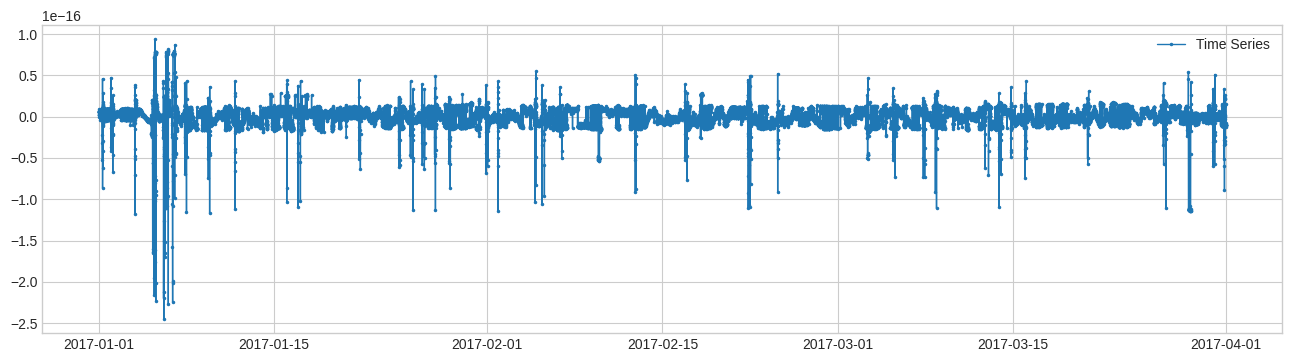

In [ ]:
from adtk.transformer import RegressionResidual

from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
from adtk.visualization import plot
s = RegressionResidual(regressor=LinearRegression(), target="20MBY10CE901_XQ01").fit_transform(df)
plot(s, ts_linewidth=1, ts_markersize=3, curve_group='all');

## Прогон на всех данных

In [ ]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


In [ ]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('/content/drive/MyDrive/InControl/YUGRES_all.sqlite')
print(cnx)
data = pd.read_sql_query("SELECT * FROM 'data'", cnx)
del data['index']
data.to_csv('data.csv')

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import numpy as np

# cnx = sqlite3.connect('YUGRES_all.sqlite')
# print(cnx.cursor)
# test_df = pd.read_sql_query("SELECT * FROM 'data'", cnx, parse_dates=True,index_col = 'timestamp')
test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
test_df = test_df[test_df['20MBY10CE901_XQ01']>195]
# time_ = pd.to_datetime(test_df['timestamp'])
# # Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in test_df.columns if col.startswith("20")]
# # Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected_test = test_df[selected_columns]
# df_selected_test.index = time_

<ipython-input-63-4e1f92c1e301>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)


In [64]:
time = df_selected_test.index
df_selected_test.fillna(method='ffill', inplace=True)

# Масштабирование данных (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected_test)
df_selected_test = pd.DataFrame(scaled_data, columns =df_selected_test.columns)
df_selected_test.index = time

<ipython-input-64-305c1fe5ddaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.fillna(method='ffill', inplace=True)


In [65]:
df_selected_test

,20MBY10CE901_XQ01,20MBY00CS901_XQ01,20MBL11CT010_XQ01,20MBL11CM001_XQ01,20MBL10CP003_XQ01,20MBL10CP004_XQ01,20MBL10CP005_XQ01,20MBL10CP010_XQ01,20MBA11DG002_XQ02,20MBA11DG002_XQ01,...,20MBH23AA101_XQ01,20MBH23AA102_XQ01,20MBH40AN001_XQ01,20MBH40AN002_XQ01,20MBH40CT101A_XQ01,20MBH40CT102A_XQ01,20MBH40CT103A_XQ01,20HNE20CQ010_XQ01_:1,20HBK10CQ011_XQ01_:1,20MBN51CF101_XQ01:1
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.897698,0.905016,0.442520,0.657846,0.244492,0.304408,0.351503,0.271210,0.993354,1.0,...,0.401525,0.151113,0.749251,0.999505,0.593792,0.601626,0.599729,0.039907,0.048096,0.577568
2017-01-01 00:05:00,0.897698,0.905016,0.442520,0.658473,0.243023,0.304408,0.348410,0.271210,0.993992,1.0,...,0.401572,0.151113,0.742781,0.999505,0.593792,0.598916,0.597015,0.039907,0.048096,0.577568
2017-01-01 00:10:00,0.897698,0.905016,0.442129,0.653149,0.240263,0.295360,0.348410,0.271210,0.993567,1.0,...,0.401525,0.151073,0.754441,0.999505,0.596491,0.598916,0.597015,0.039907,0.048096,0.577568
2017-01-01 00:15:00,0.897698,0.905016,0.442129,0.656868,0.243557,0.310905,0.348410,0.271210,0.993567,1.0,...,0.401664,0.151113,0.754441,0.999505,0.592443,0.598916,0.597015,0.039907,0.048096,0.577568
2017-01-01 00:20:00,0.896685,0.905016,0.442129,0.657612,0.246361,0.310905,0.348410,0.269888,0.994205,1.0,...,0.401525,0.151113,0.755720,0.999505,0.592443,0.598916,0.597015,0.039907,0.048096,0.577568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-23 20:40:00,0.823960,0.999090,0.711317,0.765726,0.152535,0.305336,0.422635,0.242033,0.993679,1.0,...,0.380679,0.130747,0.994517,0.586103,0.589743,0.593496,0.588874,0.041304,0.023534,0.571429
2019-07-23 20:45:00,0.823281,0.998224,0.711317,0.773789,0.152535,0.305336,0.426114,0.242033,0.993679,1.0,...,0.380679,0.130747,0.994517,0.588647,0.587044,0.589431,0.588874,0.039730,0.021992,0.571429
2019-07-23 20:50:00,0.821773,0.998657,0.711317,0.762516,0.150710,0.315545,0.426114,0.242033,0.993679,1.0,...,0.380679,0.130747,0.994517,0.589812,0.587044,0.590786,0.588874,0.041164,0.023534,0.523810


In [66]:
from adtk.transformer import RegressionResidual

from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
from adtk.transformer import CustomizedTransformer1D
from adtk.visualization import plot
s = RegressionResidual(regressor=LinearRegression(), target="20MBY10CE901_XQ01").fit_transform(df_selected_test)
# s = CustomizedTransformer1D(transform_func=abs(s))



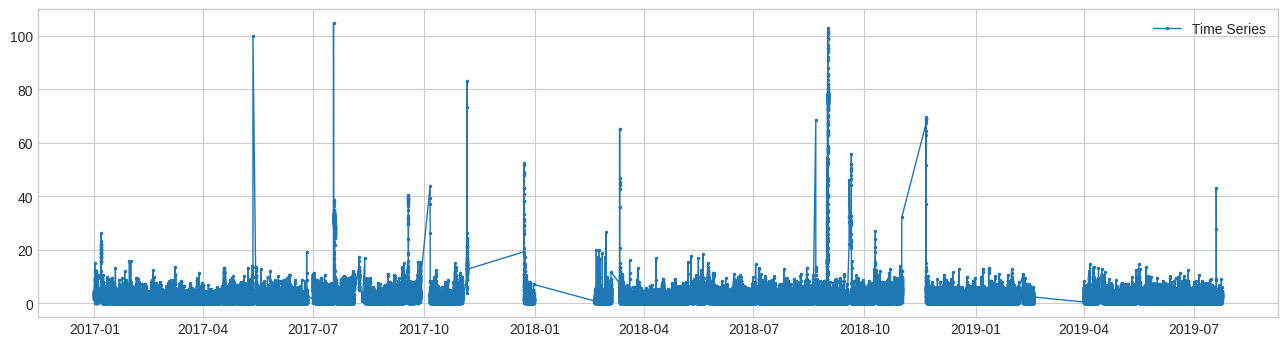

In [46]:
plot(abs(s), ts_linewidth=1, ts_markersize=3, curve_group='all');

In [47]:
s = abs(s)

In [48]:
print(s)

timestamp
2017-01-01 00:00:00    4.263619
2017-01-01 00:05:00    3.536337
2017-01-01 00:10:00    3.069575
2017-01-01 00:15:00    3.308320
2017-01-01 00:20:00    2.877139
                         ...   
2019-07-23 20:40:00    1.867380
2019-07-23 20:45:00    4.374678
2019-07-23 20:50:00    4.398731
2019-07-23 20:55:00    1.222937
2019-07-23 21:00:00    3.302882
Length: 204186, dtype: float64


In [49]:
import scipy
def scaler_loss(target_value, scaler_name, range_loss = 100):
            if scaler_name == 'cdf':
                hist = np.histogram(target_value, bins=range_loss)
                # logger.debug(target_value)
                scaler_loss = scipy.stats.rv_histogram(hist)
                # logger.debug(hist)
                target_value = scaler_loss.cdf(target_value)*range_loss
                scaler_loss = hist
            elif scaler_name == 'minmax':
                scaler_loss = MinMaxScaler(feature_range=(0, range_loss))
                loss_2d = np.reshape(target_value, (-1,1))
                scaler_loss.fit(loss_2d)
                target_value = scaler_loss.transform(loss_2d)
            return target_value, scaler_loss

In [50]:
loss = scaler_loss(s,'cdf')

In [51]:
df_loss = pd.DataFrame()
df_loss['loss'] = s
target_value, scaler_loss = scaler_loss(df_loss['loss'],'cdf')
print(target_value)



[92.56596511 86.52735207 81.80881361 ... 93.09404526 41.15446227
 84.47469569]


In [52]:
df_target = pd.DataFrame()
df_target['target_value'] = target_value
df_target.index = df_selected_test.index
print(df_target)
df_target.to_csv('reg.csv')

                     target_value
timestamp                        
2017-01-01 00:00:00     92.565965
2017-01-01 00:05:00     86.527352
2017-01-01 00:10:00     81.808814
2017-01-01 00:15:00     84.522507
2017-01-01 00:20:00     78.507307
...                           ...
2019-07-23 20:40:00     58.838663
2019-07-23 20:45:00     93.000036
2019-07-23 20:50:00     93.094045
2019-07-23 20:55:00     41.154462
2019-07-23 21:00:00     84.474696

[204186 rows x 1 columns]


In [53]:
df = pd.read_csv('reg.csv')

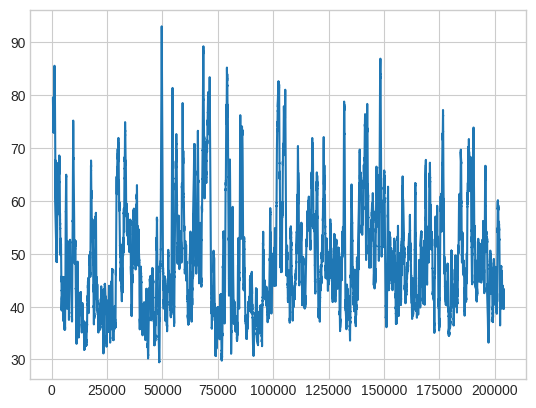

In [68]:
window_size = 512
df['target_mean'] = df['target_value'].rolling(window=window_size).mean()
plt.plot(df['target_mean'])

In [69]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [70]:
import pandas as pd

data_to_remove = {
    'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-12-22 00:00:00',
               '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00',
               '2017-12-22 18:10:00', '2019-05-25 01:10:00', '2017-07-06 00:00:00',
               '2019-05-26 00:00:00', '2017-03-03 00:00:00'],
    'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2018-02-19 00:00:00',
             '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00',
             '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00',
             '2019-05-26 23:55:00', '2017-03-03 23:55:00']
}

# Преобразуем даты в формат Timestamp
date_tuples = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(data_to_remove['Начало'], data_to_remove['Конец'])]

print(date_tuples)

[(Timestamp('2017-01-13 16:05:00'), Timestamp('2017-01-21 08:50:00')), (Timestamp('2017-01-24 13:35:00'), Timestamp('2017-02-06 05:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2018-02-19 00:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-22 23:55:00')), (Timestamp('2017-03-05 00:00:00'), Timestamp('2017-03-05 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00')), (Timestamp('2017-12-22 18:10:00'), Timestamp('2018-02-20 20:55:00')), (Timestamp('2019-05-25 01:10:00'), Timestamp('2019-05-28 14:45:00')), (Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-06 23:55:00')), (Timestamp('2019-05-26 00:00:00'), Timestamp('2019-05-26 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00'))]


In [71]:
import numpy as np
import pandas as pd

# Замените 'df' на вашу собственную переменную DataFrame
# и 'timestamp' на имя столбца с временными метками,
# 'value' на имя столбца со значениями

# Рассчитываем порог
short_threshold = np.percentile(df['target_value'], 80)

# Создаем список, чтобы хранить интервалы
intervals = []

# Инициализируем переменные для текущего интервала
current_interval_start = None
current_interval_end = None

# Проходимся по всем строкам DataFrame
for index, row in df.iterrows():
    timestamp = row['timestamp']  # Предполагается, что столбец 'timestamp' содержит временные метки
    # Если значение выше порога, начинаем новый интервал
    if row['target_mean'] > short_threshold:
        if current_interval_start is None:
            current_interval_start = timestamp
        current_interval_end = timestamp
    else:
        # Если значение ниже порога, закрываем текущий интервал
        if current_interval_start is not None:
            # Проверяем длительность интервала
            if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
                intervals.append((current_interval_start, current_interval_end))
            # Сбрасываем переменные текущего интервала
            current_interval_start = None
            current_interval_end = None

# Проверяем последний интервал после завершения цикла
if current_interval_start is not None:
    if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
        intervals.append((current_interval_start, current_interval_end))


                 timestamp  target_value  target_mean
511    2017-01-02 18:35:00     74.121625    79.541926
512    2017-01-02 18:40:00     78.280180    79.514024
513    2017-01-02 18:45:00     22.145658    79.388278
514    2017-01-02 18:50:00     41.330965    79.309220
515    2017-01-02 18:55:00     60.287666    79.261886
...                    ...           ...          ...
148587 2018-11-22 02:40:00     12.958294    79.362375
148588 2018-11-22 02:45:00     85.273155    79.356911
148589 2018-11-22 02:50:00     71.416096    79.309808
148590 2018-11-22 02:55:00     56.340121    79.230824
148591 2018-11-22 03:00:00     69.123616    79.184110

[2740 rows x 3 columns]
                timestamp  target_value  target_mean
2772  2017-01-13 16:05:00     33.452638    60.455653
2773  2017-01-13 16:10:00     65.643413    60.432504
2774  2017-01-13 16:15:00     52.166465    60.342982
2775  2017-01-13 16:20:00     76.221236    60.386425
2776  2017-01-13 16:25:00     32.586773    60.353672
...      

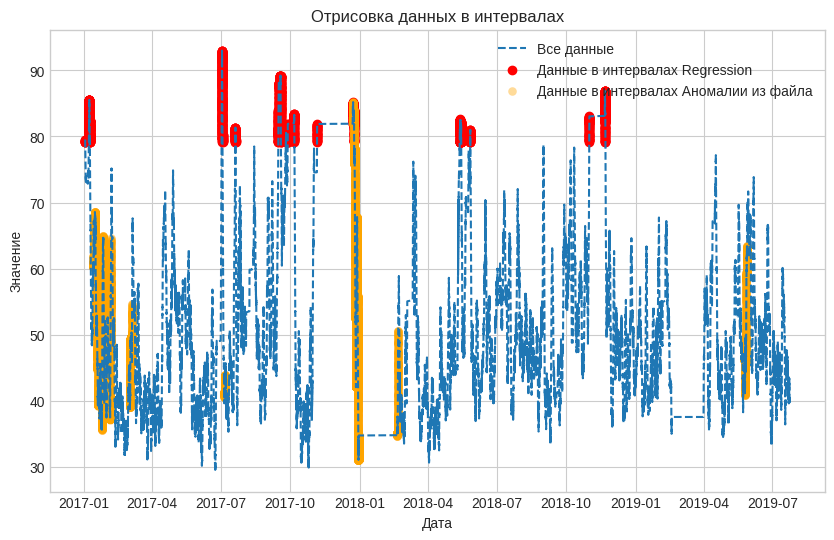

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


df['timestamp'] = pd.to_datetime(df['timestamp'])
# Определите интервалы
intervals = intervals
intervals_an = date_tuples

# Фильтруем DataFrame, чтобы получить только строки, которые находятся в интервалах
filtered_df = pd.DataFrame()
filtered_df_an = pd.DataFrame()

for interval in intervals:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df = pd.concat([filtered_df, interval_df])
print(filtered_df)
for interval in intervals_an:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df_an = pd.concat([filtered_df_an, interval_df])
print(filtered_df_an)

# Отрисовываем полученные данные
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['target_mean'], label='Все данные', linestyle='--')
plt.scatter(filtered_df['timestamp'], filtered_df['target_mean'], color='red', label='Данные в интервалах Regression')
plt.scatter(filtered_df_an['timestamp'], filtered_df_an['target_mean'], color='orange', label='Данные в интервалах Аномалии из файла', alpha = 0.4,linewidths=0.1)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Отрисовка данных в интервалах')
plt.grid(True)
plt.show()

In [75]:
import json
from datetime import datetime


# Преобразование интервалов в список словарей
interval_dicts = []

for start, end in intervals:
    interval_dict = {
        "start": str(start),
        "end": str(end),
        "duration_hours": (end - start).total_seconds() / 3600
    }
    interval_dicts.append(interval_dict)

# Преобразование в JSON
json_data = json.dumps(interval_dicts, indent=4)

# Сохранение JSON в файл
with open("intervals_regression.json", "w") as json_file:
    json_file.write(json_data)